In [6]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

Image-treat-1: sem data augmentation, com normalização e sem equalização

Image-treat-2: com data augmentation, com normalização e sem equalização

Image-treat-3: com data augmentation, com normalização e com equalização

Abordagem 4: com data augmentation, com normalização e com equalização, usando mae pra loss, batch de 128 --> pq eu observei muita alteração da direção do crescimento

Abordagem 5: sem data augmentation, com normalização e sem equalização, usando mae pra loss, batch de 128

Abordagem 6: vgg 16 com data augmentation, relu, equalização, normalização, usando mae pra loss, batch de 64 e sem transfer learning

In [9]:
activations = ['relu', 'lrelu']
img_treats=['image-treat-1', 'image-treat-2', 'image-treat-3', 'abordagem-4', 'abordagem-5', 'abordagem6', 'abordagem7', 'abordagem9', 'abordagem-squeeze1']
nets = ['lenet', 'alexnet', 'vgg16', 'squeeze']

activation, img_treat, net = activations[0], img_treats[8], nets[3]
activation, img_treat, net

('relu', 'abordagem-squeeze1', 'squeeze')

In [10]:
 df_hist = pd.read_csv('callbacks/'+net+'/age/consolidados/history-regression-'+img_treat+ '-' + activation + '.csv').rename(
    columns={'epoch': 'Época', 'loss':'MAE Treino', 'val_loss': 'MAE Validação', 
             'mean_squared_error': 'RMSE Treino', 'val_mean_squared_error': 'RMSE Validação'})

# df_hist = pd.read_csv('history-regression-'+img_treat+ '-' + activation + '.csv').rename(
#     columns={'epoch': 'Época', 'loss':'MAE Treino', 'val_loss': 'MAE Validação', 
#              'mean_squared_error': 'RMSE Treino', 'val_mean_squared_error': 'RMSE Validação'})

df_hist['Época']+=1
# df_hist = df_hist[1:]
#df_hist_lenet = df_hist[6:]

In [11]:
df_hist# = df_hist[16:]#.sort_values(by='MAE Validação')

,Época,MAE Treino,RMSE Treino,MAE Validação,RMSE Validação
0,1,13.149593,317.540407,11.235712,200.123983
1,2,11.374261,215.887279,11.839402,245.791659
2,3,11.373700,215.808955,11.440696,202.056811
3,4,11.251200,210.573766,11.030528,201.821488
4,5,11.232207,210.073569,11.043406,204.859864
5,6,11.221348,209.648359,10.974135,200.040088
6,7,11.170522,207.881166,10.931423,196.919738
7,8,11.099204,205.362027,11.125511,194.300556
8,9,11.085065,204.851320,10.830684,193.135512
9,10,11.095640,205.029255,10.894174,195.553904


In [12]:
df_hist[['RMSE Treino', 'RMSE Validação']] = np.sqrt(df_hist[['RMSE Treino', 'RMSE Validação']])

In [13]:
df_hist = df_hist.round(2)
#df_hist.drop(index=[i for i in range(16, 36)], inplace=True)
# df_hist.to_csv('callbacks/'+net+'/age/consolidados/history-regression-'+img_treat+ '-' + activation + '.csv', index=False)

In [14]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("", ["0.5","0.1"])

In [15]:
#df_hist.loc[2:].drop(['MAE Treino', 'MAE Validação'], axis=1)
df_hist.drop(['MAE Treino', 'MAE Validação'], axis=1)

,Época,RMSE Treino,RMSE Validação
0,1,17.82,14.15
1,2,14.69,15.68
2,3,14.69,14.21
3,4,14.51,14.21
4,5,14.49,14.31
5,6,14.48,14.14
6,7,14.42,14.03
7,8,14.33,13.94
8,9,14.31,13.90
9,10,14.32,13.98


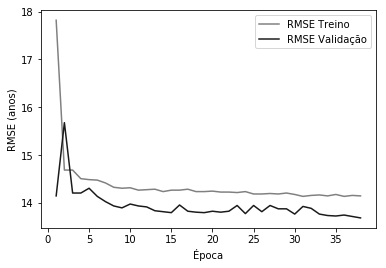

In [16]:
ax1 = df_hist.drop(['MAE Treino', 'MAE Validação'], axis=1).plot(x='Época', colormap=cmap)
ax1.set_ylabel("RMSE (anos)")
ax1.get_figure().savefig('graficos/result-hist/fig-history-' + img_treat+ '-' + net + '-' + activation +'-rmse.png')

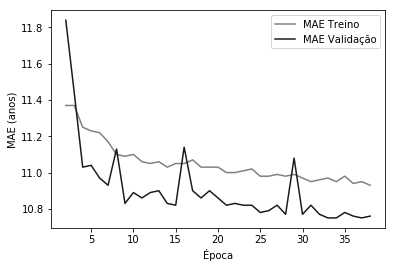

In [17]:
ax1 = df_hist[1:].drop(['RMSE Treino', 'RMSE Validação'], axis=1).plot(x='Época', colormap=cmap)
ax1.set_ylabel("MAE (anos)")
ax1.get_figure().savefig('graficos/result-hist/fig-history-' + img_treat+ '-' + net + '-' + activation +'-mae.png')